### Regression Models & Evaluation Techniques


In [1]:
# prepare environment
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
from pydataset import data
%matplotlib inline


#from viz import evaluation_example1, evaluation_example2, evaluation_example3, evaluation_example4, evaluation_example5

plt.rc("axes.spines", top=False, right=False)


# generate our student grade data
df = pd.DataFrame(np.array([[100, 96], [93, 90], [84, 89], [80, 85], [76, 80], [70, 68], [79, 75]]), 
                  columns = ['x', 'y'])

x = df['x']
y = df['y']

df.head(3)

,x,y
0,100,96
1,93,90
2,84,89


### Exercises


In [2]:
tips = data("tips")

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill. You may follow these steps to do that:

    -import the method from statsmodels: from statsmodels.formula.api import ols

    -fit the model to your data, where x = total_bill and y = tip: regr = ols('y ~ x', data=df).fit()

    -compute yhat, the predictions of tip using total_bill: df['yhat'] = regr.predict(df.x)

Create a file evaluate.py that contains the following functions.

In [5]:
# assign x and y variables
x = tips["total_bill"]
y = tips["tip"]

# fit model to data
regr = ols("y ~ x", data=tips).fit()
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Fri, 11 Oct 2019   Prob (F-statistic):           6.69e-34
Time:                        17:05:45   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
x              0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# compute yhat, the predictions of tip using total_bill
tips["yhat"] = regr.predict(pd.DataFrame(x))
yhat = tips["yhat"]
yhat

1      2.704636
2      2.006223
3      3.126835
4      3.407250
5      3.502822
6      3.576340
7      1.841335
8      3.743329
9      2.499838
10     2.472532
11     1.998871
12     4.623434
13     2.539748
14     2.855871
15     2.477783
16     3.186699
17     2.005173
18     2.631119
19     2.702536
20     3.089026
21     2.802309
22     3.051217
23     2.576506
24     5.060336
25     3.001856
26     2.790756
27     2.324447
28     2.253031
29     3.199302
30     2.984001
31     1.923254
32     2.847470
33     2.501939
34     3.093227
35     2.787606
36     3.447160
37     2.633219
38     2.698335
39     2.883178
40     4.204386
41     2.604863
42     2.753998
43     2.384311
44     1.936907
45     4.113015
46     2.841168
47     3.254965
48     4.323064
49     3.918720
50     2.814912
51     2.237277
52     2.000972
53     4.576173
54     1.964213
55     3.604696
56     2.967197
57     4.912252
58     3.693967
59     2.100745
60     5.989803
61     3.051217
62     2.370658
63     2

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822


-Write a function, plot_residuals(x, y, dataframe) that takes the feature, the target, and the dataframe as input and returns a residual plot. (hint: seaborn has an easy way to do this!)

In [8]:
# plot_residuals(x, y, dataframe)

def plot_residuals(x, y, df):
    return sns.residplot(x, y, df)

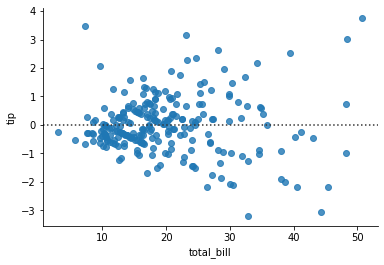

In [9]:
plot_residuals(x, y, tips)

-Write a function, regression_errors(y, yhat), that takes in y and yhat, returns the sum of squared errors (SSE), explained sum of squares (ESS), total sum of squares (TSS), mean squared error (MSE) and root mean squared error (RMSE).

In [10]:
# regression_errors(y, yhat)
def regression_errors(y, yhat, df):
    """takes in variables y and yhat
    which are pandas series'
    """
    from math import sqrt
    MSE = mean_squared_error(y, yhat)
    SSE = MSE * len(df)
    ESS = sum((yhat - y.mean())**2)
    TSS = SSE + ESS
    RMSE = sqrt(MSE)
    return SSE, ESS, TSS, MSE, RMSE

In [11]:
# Test regression_errors func
SSE, ESS, TSS, MSE, RMSE = regression_errors(y, yhat, tips)
print(SSE)
print(ESS)
print(TSS)
print(MSE)
print(RMSE)

252.788743850776
212.4237331984042
465.21247704918017
1.036019442011377
1.0178504025697377


-Write a function, baseline_mean_errors(y), that takes in your target, y, computes the SSE, MSE & RMSE when yhat is equal to the mean of all y, and returns the error values (SSE, MSE, and RMSE).

In [13]:
# baseline_mean_errors(y)
def baseline_mean_errors(y):
    
    return SSE, MSE, RMSE

-Write a function, better_than_baseline(SSE), that returns true if your model performs better than the baseline, otherwise false.



In [14]:
# better_than_baseline(SSE)
def better_than_baseline(SSE):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-14-50ff09b2505d>, line 3)